In [1]:
%pylab inline
import os
import time

import tensorflow as tf


Populating the interactive namespace from numpy and matplotlib


In [39]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [41]:
labelnames = {"airplane" : 0,
"automobile" : 1,
"bird" : 2,
"cat" : 3,
"deer" : 4,
"dog" : 5,
"frog" : 6,
"horse" : 7,
"ship" : 8,
"truck" : 9}

In [42]:
class NearestNeighbor:
    def __init__(self):
        pass
    
    def train(self, X, y):
        """
        X is N x D where each row is an example. 
        Y is 1-D label vector. (N x 1)
        """
        # nearest neighbor simply memorizes
        self.Xtr = X
        self.Ytr = y
    
    def predict(self, X):
        """
        X is N x D where each row is an example we wish to predict
        label for.
        return: list, -> 1D vector of size N (N x 1).
        """
        n = X.shape[0] # N
        Ypred = np.zeros(n, dtype=self.Ytr.dtype)
        
        # loop over all test rows
        for i in range(n):
            
            # find the nearest training image to the i'th test image
            # using L1 distance
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis=1)
            min_index = np.argmin(distances) # get the index with the smallest distance
            Ypred[i] = self.Ytr[min_index]
        return Ypred

In [25]:
x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_test = x_test.reshape(x_test.shape[0], 32*32*3)

In [28]:
nn = NearestNeighbor()
nn.train(x_train[:1000], y_train[:1000])

In [37]:
ypred = nn.predict(x_test)

1
8
0
6
2
2
4
0
1


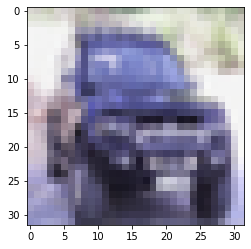

In [45]:
for i in range(1, 10):
    print(ypred[i])
    plt.imshow(x_test[i].reshape(32, 32, 3))
    print("="*10)